In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pylab import rcParams
from scipy.stats import spearmanr
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

%matplotlib inline
rcParams['figure.figsize'] = 5,4
sns.set_style('whitegrid')

caminho = "/home/leonardo/Artificial Intelligence/LinkedIn Learning/arquivos_de_exercicios_python_para_ciencia_dados_basico/dados/mtcars.csv"

carros = pd.read_csv(caminho)
carros.columns = ['nomes', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'qnt_marchas', 'carb']

In [6]:
carros_colunas = ['drat', 'carb']
carros_dados = carros[carros_colunas].values

y = carros['am'].values

<AxesSubplot:xlabel='drat', ylabel='carb'>

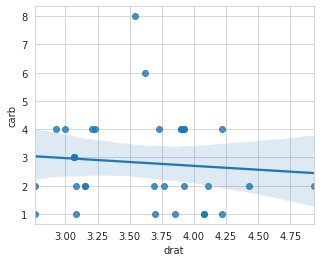

In [7]:
sns.regplot(x='drat', y='carb', data=carros, scatter=True)

In [10]:
drat = carros['drat']
carb = carros['carb']

spearman, p = spearmanr(drat, carb)
print(spearman)

-0.1252229399201802


In [11]:
carros.isnull().sum()

nomes          0
mpg            0
cyl            0
disp           0
hp             0
drat           0
wt             0
qsec           0
vs             0
am             0
qnt_marchas    0
carb           0
dtype: int64

<AxesSubplot:xlabel='am', ylabel='count'>

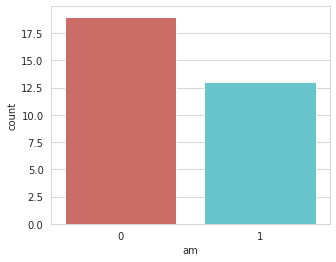

In [12]:
sns.countplot(x='am', data=carros, palette='hls')

In [13]:
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nomes        32 non-null     object 
 1   mpg          32 non-null     float64
 2   cyl          32 non-null     int64  
 3   disp         32 non-null     float64
 4   hp           32 non-null     int64  
 5   drat         32 non-null     float64
 6   wt           32 non-null     float64
 7   qsec         32 non-null     float64
 8   vs           32 non-null     int64  
 9   am           32 non-null     int64  
 10  qnt_marchas  32 non-null     int64  
 11  carb         32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [14]:
X = scale(carros_dados)


In [15]:
lr = LogisticRegression().fit(X, y)
print(lr.score(X,y))

0.8125


In [16]:
y_predito = lr.predict(X)
print(classification_report(y, y_predito))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.73      0.85      0.79        13

    accuracy                           0.81        32
   macro avg       0.81      0.82      0.81        32
weighted avg       0.82      0.81      0.81        32

